In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

import yfinance as yf

## Spread

In [19]:
data_df = yf.download('BTC-USD ETH-USD', period='1y', interval='1h')
data_df = data_df['Close']

data_df.head()

[*********************100%***********************]  2 of 2 completed


,BTC-USD,ETH-USD
2021-08-05 09:00:00+00:00,38028.019531,2593.892578
2021-08-05 10:00:00+00:00,37997.933594,2611.299072
2021-08-05 11:00:00+00:00,38057.246094,2625.188477
2021-08-05 12:00:00+00:00,38025.167969,2613.216064
2021-08-05 13:00:00+00:00,37915.699219,2674.062988


### absolute difference

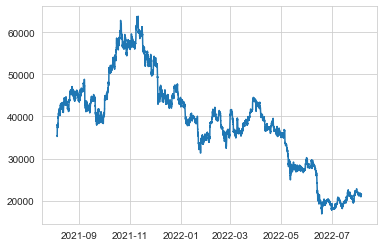

In [20]:
spread = data_df['BTC-USD'] - data_df['ETH-USD']

fig, ax = plt.subplots()
ax.plot(spread)

### difference of log

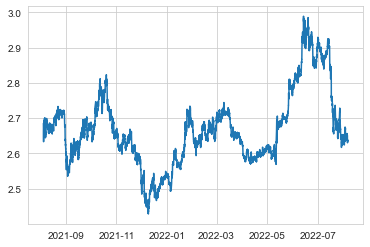

In [21]:
spread = np.log(data_df['BTC-USD'] / data_df['ETH-USD'])

fig, ax = plt.subplots()
ax.plot(spread)

### difference of log returns

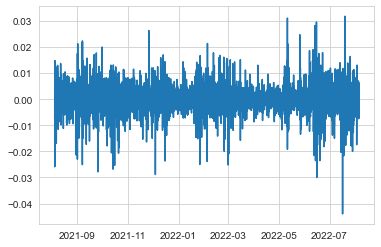

In [18]:
log_returns_df = np.log(1 + data_df.pct_change())
log_returns_df = log_returns_df.dropna()

spread = log_returns_df['BTC-USD'] - log_returns_df['ETH-USD']

fig, ax = plt.subplots()
ax.plot(spread)

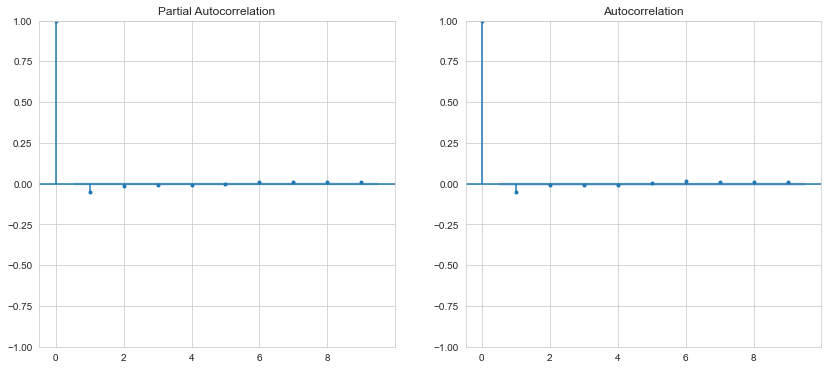

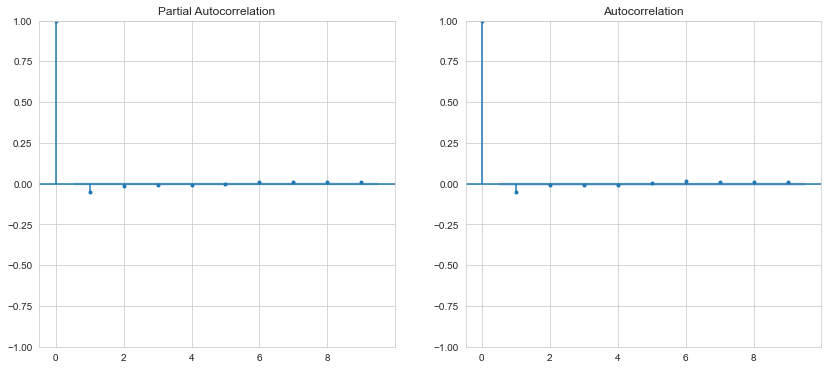

In [5]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

fig, axs = plt.subplots(1, 2, figsize=(14, 6))
plot_pacf(time_series, method='ywm', ax=axs[0], lags=np.arange(10), alpha=0.05, markersize=3)
plot_acf(time_series, ax=axs[1], lags=np.arange(10), alpha=0.05, markersize=3)

## Interpolation

In [26]:
import numpy as np
from scipy.interpolate import splrep, splev

x = np.linspace(0, 50, endpoint=True)
y = np.cos(-x**2/9.0)
spl = splrep(x, y)

In [32]:
x_new = np.arange(0, 51, 0.1)
y_new = splev(x_new, spl)

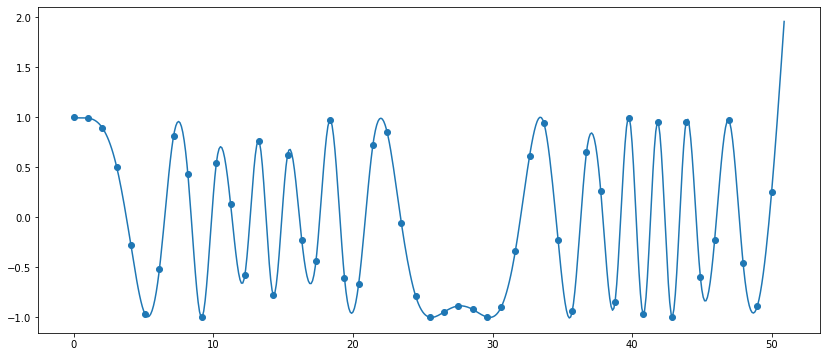

In [33]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14, 6))
ax.scatter(x, y)
ax.plot(x_new, y_new)

## Forecast of the time series

In [1]:
import datetime as dt

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

### get dates from a number of points interval

In [7]:
today = dt.date.today()
today

datetime.date(2022, 7, 25)

In [8]:
dt.date.today().strftime("%Y-%m-%d")

'2022-07-25'

In [11]:
today - dt.timedelta(days=27)

datetime.date(2022, 6, 28)

In [23]:
dt.datetime.strptime('2022-12-24', "%Y-%m-%d").date()

datetime.date(2022, 12, 24)

## Trading

In [1]:
import yfinance as yf

In [3]:
btc_ticker = yf.Ticker("BTC-USD")

btc_ticker.info

{'companyOfficers': [],
 'name': 'Bitcoin',
 'startDate': 1367107200,
 'description': 'Bitcoin (BTC) is a cryptocurrency . Users are able to generate BTC through the process of mining. Bitcoin has a current supply of 19,102,462. The last known price of Bitcoin is 22,191.78334991 USD and is down -1.08 over the last 24 hours. It is currently trading on 9634 active market(s) with $25,387,207,783.68 traded over the last 24 hours. More information can be found at https://bitcoin.org/.',
 'maxAge': 1,
 'exchange': 'CCC',
 'shortName': 'Bitcoin USD',
 'exchangeTimezoneName': 'UTC',
 'exchangeTimezoneShortName': 'UTC',
 'isEsgPopulated': False,
 'gmtOffSetMilliseconds': '0',
 'quoteType': 'CRYPTOCURRENCY',
 'symbol': 'BTC-USD',
 'messageBoardId': 'finmb_BTC_CCC',
 'market': 'ccc_market',
 'previousClose': 22588.861,
 'regularMarketOpen': 22588.861,
 'twoHundredDayAverage': 34754.617,
 'trailingAnnualDividendYield': None,
 'payoutRatio': None,
 'volume24Hr': 30560985088,
 'regularMarketDayHigh'